Generated Tensor: [[0.1277448  0.22969508 0.173074   0.4416356  0.6624421  0.62778306]
 [0.25820267 0.10393941 0.5258502  0.419747   0.0640322  0.6194848 ]
 [0.25840116 0.68536115 0.50654614 0.33342695 0.12836981 0.22329414]
 [0.7561015  0.40338922 0.8664998  0.87923217 0.7133088  0.64825106]]
Rank: 2, Shape: (4, 6)
Reshaped Tensor: [[[0.1277448  0.22969508 0.173074   0.4416356 ]
  [0.6624421  0.62778306 0.25820267 0.10393941]
  [0.5258502  0.419747   0.0640322  0.6194848 ]]

 [[0.25840116 0.68536115 0.50654614 0.33342695]
  [0.12836981 0.22329414 0.7561015  0.40338922]
  [0.8664998  0.87923217 0.7133088  0.64825106]]]
Transposed Tensor: [[[0.1277448  0.22969508 0.173074   0.4416356 ]
  [0.25840116 0.68536115 0.50654614 0.33342695]]

 [[0.6624421  0.62778306 0.25820267 0.10393941]
  [0.12836981 0.22329414 0.7561015  0.40338922]]

 [[0.5258502  0.419747   0.0640322  0.6194848 ]
  [0.8664998  0.87923217 0.7133088  0.64825106]]]
Broadcasted Tensor: [[0.07158458 0.45222044 0.92043865 0.371

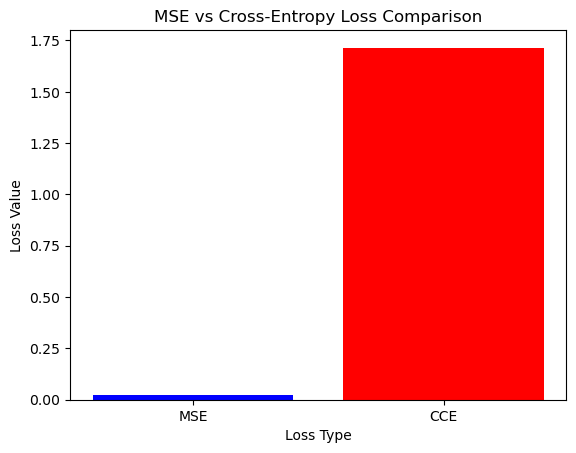

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8786 - loss: 0.4297 - val_accuracy: 0.9550 - val_loss: 0.1502
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9651 - loss: 0.1215 - val_accuracy: 0.9695 - val_loss: 0.1060
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9755 - loss: 0.0800 - val_accuracy: 0.9728 - val_loss: 0.0891
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9819 - loss: 0.0607 - val_accuracy: 0.9754 - val_loss: 0.0808
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9875 - loss: 0.0427 - val_accuracy: 0.9774 - val_loss: 0.0721
To launch TensorBoard, use: tensorboard --logdir logs/fit/
1. Observing accuracy curves: Adam converges quicker, whereas SGD takes longer but may generalize better.
2. Detecting overfitting using TensorBoard: A widening gap between training and validation accuracy signals overfitting.
3. Effect of increased epochs: More training can enhance accurac

In [3]:
import os
import sys
import warnings

# Suppress TensorFlow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')

# Temporarily redirect stdout/stderr
original_stdout = sys.stdout
original_stderr = sys.stderr
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

# TensorFlow and other imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard

# Restore stdout/stderr
sys.stdout = original_stdout
sys.stderr = original_stderr

# ===========================
# Task 1: Tensor Transformations & Reshaping
# ===========================
tensor_data = tf.random.uniform((4, 6))
print("Generated Tensor:", tensor_data.numpy())

tensor_rank = tf.rank(tensor_data).numpy()
tensor_shape = tensor_data.shape
print(f"Rank: {tensor_rank}, Shape: {tensor_shape}")

reshaped_data = tf.reshape(tensor_data, (2, 3, 4))
transposed_data = tf.transpose(reshaped_data, perm=[1, 0, 2])
print("Reshaped Tensor:", reshaped_data.numpy())
print("Transposed Tensor:", transposed_data.numpy())

small_data = tf.random.uniform((1, 4))
broadcasted_data = tf.broadcast_to(small_data, (4, 4))
result_data = tensor_data[:, :4] + broadcasted_data
print("Broadcasted Tensor:", broadcasted_data.numpy())
print("Summed Tensor:", result_data.numpy())

print("Broadcasting enables a smaller tensor to be extended to fit a larger tensor's shape for element-wise operations.")

# ===========================
# Task 2: Compute and Compare Loss Functions
# ===========================
y_actual = tf.constant([0.0, 1.0, 1.0, 0.0])
y_predicted = tf.constant([0.2, 0.9, 0.8, 0.1])

mse_loss_fn = MeanSquaredError()
cce_loss_fn = CategoricalCrossentropy()

mse_result = mse_loss_fn(y_actual, y_predicted).numpy()
cce_result = cce_loss_fn(tf.expand_dims(y_actual, axis=0), tf.expand_dims(y_predicted, axis=0)).numpy()
print(f"MSE Loss: {mse_result}, CCE Loss: {cce_result}")

y_predicted_updated = tf.constant([0.1, 0.8, 0.9, 0.2])
mse_updated = mse_loss_fn(y_actual, y_predicted_updated).numpy()
cce_updated = cce_loss_fn(tf.expand_dims(y_actual, axis=0), tf.expand_dims(y_predicted_updated, axis=0)).numpy()
print(f"Updated MSE Loss: {mse_updated}, Updated CCE Loss: {cce_updated}")

plt.bar(["MSE", "CCE"], [mse_result, cce_result], color=['blue', 'red'])
plt.xlabel("Loss Type")
plt.ylabel("Loss Value")
plt.title("MSE vs Cross-Entropy Loss Comparison")
plt.show()

# ===========================
# Task 3: Neural Network Training with TensorBoard
# ===========================
def build_model():
    return Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

log_directory = "logs/fit/"
os.makedirs(log_directory, exist_ok=True)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

model_tb = build_model()
model_tb.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
tb_callback = TensorBoard(log_dir=log_directory, histogram_freq=1)

model_tb.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), callbacks=[tb_callback])

print("To launch TensorBoard, use: tensorboard --logdir logs/fit/")

# ===========================
# Key Explanations
# ===========================
print("1. Observing accuracy curves: Adam converges quicker, whereas SGD takes longer but may generalize better.")
print("2. Detecting overfitting using TensorBoard: A widening gap between training and validation accuracy signals overfitting.")
print("3. Effect of increased epochs: More training can enhance accuracy initially but might lead to overfitting.")
